# Data Preprocessing & Feature Engineering:
Now that we've wrangled our data and have done some exploratory analysis, let's move onto the feature engineering step.

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MultiLabelBinarizer

In [63]:
#Importing the dataframe we saved from our previous "Data Wrangling and Exploratory Data Analysis" Notebook
df = pd.read_csv('WnvDataframe',parse_dates = ['Date'])

# Feature 1: Separating into Weekday & Weekend

In [64]:
daysofweek = []
for date in df['Date'].dt.dayofweek:
    if date == 0:
        daysofweek.append('Monday')
    elif date == 1:
        daysofweek.append('Tuesday')
    elif date == 2:
        daysofweek.append('Wednesday')
    elif date == 3:
        daysofweek.append('Thursday')
    elif date == 4:
        daysofweek.append('Friday')
    elif date == 5:
        daysofweek.append('Saturday')
    else:
        daysofweek.append('Sunday')
df['DayOfWeek'] = daysofweek
df2 = pd.get_dummies(df, columns=['DayOfWeek'],prefix='',prefix_sep='')

In [79]:
df.groupby('DayOfWeek').sum()

Block     Latitude    Longitude  AddressAccuracy  NumMosquitos  \
DayOfWeek                                                                    
Friday     140719  157547.1691 -330152.5122            30183         40740   
Monday      42747   55040.5721 -115356.2525            10389         16469   
Thursday    91494  107775.2096 -225906.4633            20199         34710   
Tuesday     38591   44193.1018  -92601.9271             8197         11514   
Wednesday   61385   75026.9388 -157358.0846            13184         31606   

           WnvPresent      Tmax      Tmin      Tavg  Depart  ...   HZ  MIFG  \
DayOfWeek                                                    ...              
Friday            135  299186.0  234001.0  267550.0   775.0  ...  288     0   
Monday             16  113040.0   86912.0  100182.0  7893.0  ...  178     0   
Thursday          215  207314.5  159131.0  183833.0  5218.0  ...  760     0   
Tuesday            68   89049.0   68199.0   78894.0  5961.0  ...  281     0   
Wednesday         117  152031.5  120434.5  136715.0  8942.0  ...  773     0   

             RA  SN  SQ   TS  TSRA  VCFG  VCTS  Counter  
DayOfWeek                                                
Friday     1609   0   0  523   688     0     0     3764  
Monday      254   0   0    0   317     0     0     1315  
Thursday    734   0   0  233   374     0   121     2576  
Tuesday     360   0   0   23    93     0   254     1056  
Wednesday   728   0   0  544   637     0   129     1795  

[5 rows x 38 columns]

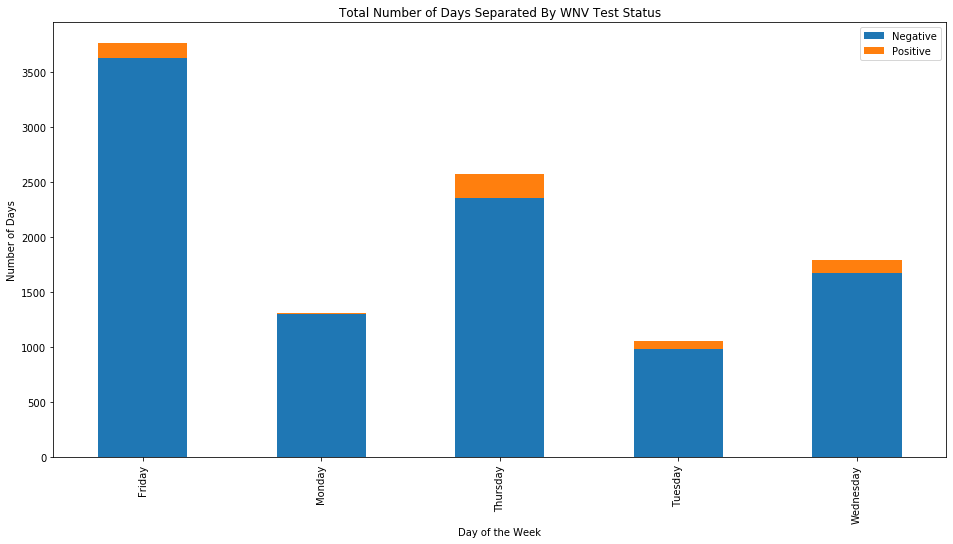

In [114]:
df['Counter'] = 1
df_dayofweek = df.groupby(['DayOfWeek','WnvPresent']).sum()
plt.rcParams["figure.figsize"] = (16,8)
df_dayofweek.Counter.unstack().plot.bar(stacked=True)
plt.title('Total Number of Days Separated By WNV Test Status')
plt.legend(labels=['Negative','Positive'])
plt.ylabel('Number of Days')
plt.xlabel('Day of the Week')
plt.show();